<a href="https://colab.research.google.com/github/malihamostafa023-cmd/toyproject/blob/main/5MLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset inside Drive
# Example: if your dataset is at "MyDrive/chest_xray"
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/chest_xray"

# Verify the dataset folders exist
import os

for split in ["train", "val", "test"]:
    path = os.path.join(DATA_DIR, split)
    if not os.path.isdir(path):
        print(f"Missing: {path}")
    else:
        print(f"Found: {path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found: /content/drive/MyDrive/Colab Notebooks/chest_xray/train
Found: /content/drive/MyDrive/Colab Notebooks/chest_xray/val
Found: /content/drive/MyDrive/Colab Notebooks/chest_xray/test


In [ ]:
import os

# List contents of the directories
print("Contents of /content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL:")
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL"))

print("\nContents of /content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA:")
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA"))

print("\nContents of /content/drive/MyDrive/Colab Notebooks/chest_xray/val/NORMAL:")
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/chest_xray/val/NORMAL"))

print("\nContents of /content/drive/MyDrive/Colab Notebooks/chest_xray/val/PNEUMONIA:")
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/chest_xray/val/PNEUMONIA"))

print("\nContents of /content/drive/MyDrive/Colab Notebooks/chest_xray/test/NORMAL:")
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/chest_xray/test/NORMAL"))

print("\nContents of /content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA:")
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA"))

Contents of /content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL:
['IM-0543-0001.jpeg', 'IM-0539-0001-0001.jpeg', 'IM-0539-0001.jpeg', 'IM-0531-0001.jpeg', 'IM-0532-0001.jpeg', 'IM-0538-0001.jpeg', 'IM-0509-0001.jpeg', 'IM-0548-0001.jpeg', 'IM-0523-0001-0001.jpeg', 'IM-0519-0001.jpeg', 'IM-0514-0001.jpeg', 'IM-0540-0001.jpeg', 'IM-0511-0001-0001.jpeg', 'IM-0524-0001.jpeg', 'IM-0512-0001.jpeg', 'IM-0511-0001.jpeg', 'IM-0523-0001.jpeg', 'IM-0525-0001-0001.jpeg', 'IM-0551-0001-0001.jpeg', 'IM-0515-0001.jpeg', 'IM-0513-0001.jpeg', 'IM-0517-0001.jpeg', 'IM-0516-0001.jpeg', 'IM-0547-0001.jpeg', 'IM-0543-0001-0002.jpeg', 'IM-0517-0001-0001.jpeg', 'IM-0533-0001-0001.jpeg', 'IM-0551-0001-0002.jpeg', 'IM-0525-0001-0002.jpeg', 'IM-0534-0001.jpeg', 'IM-0542-0001.jpeg', 'IM-0523-0001-0002.jpeg', 'IM-0511-0001-0002.jpeg', 'IM-0549-0001.jpeg', 'IM-0537-0001.jpeg', 'IM-0525-0001.jpeg', 'IM-0539-0001-0002.jpeg', 'IM-0528-0001.jpeg', 'IM-0526-0001.jpeg', 'IM-0545-0001.jpeg', 'IM-0553-0001-0001

In [ ]:
# OPTION A: data already in /content
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/chest_xray"

# OPTION B: mount Drive and point to your folder
# from google.colab import drive
# drive.mount('/content/drive')
# DATA_DIR = "/content/drive/MyDrive/chest_xray"

assert os.path.isdir(DATA_DIR), f"Missing folder: {DATA_DIR}"
for split in ["train", "val", "test"]:
    assert os.path.isdir(os.path.join(DATA_DIR, split)), f"Missing split folder: {split}"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
import itertools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_dir = os.path.join(DATA_DIR, "train")
val_dir   = os.path.join(DATA_DIR, "val")
test_dir  = os.path.join(DATA_DIR, "test")

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode="binary",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    label_mode="binary",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode="binary",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Store class names before prefetching
CLASS_NAMES = train_ds.class_names
print("Classes:", CLASS_NAMES)

# If you suspect a typo like 'PNEUMONΙΑ' in val/test, uncomment this to inspect folders:
# print(sorted([p.name for p in Path(val_dir).iterdir() if p.is_dir()]))

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Classes: ['NORMAL', 'PNEUMONIA']


In [ ]:
# Cache and prefetch
def prepare(ds, training=False):
    if training:
        ds = ds.shuffle(1000, seed=SEED)
    return ds.prefetch(AUTOTUNE)

train_ds = prepare(train_ds, training=True)
val_ds   = prepare(val_ds)
test_ds  = prepare(test_ds)

# Data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
], name="augmentation")

In [ ]:
base = tf.keras.applications.EfficientNetB0(
    include_top=False, weights="imagenet", input_shape=IMG_SIZE + (3,), pooling="avg"
)
base.trainable = False  # start with frozen backbone

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base(x, training=False)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid", dtype="float32")(x)  # keep numeric stability
model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.AUC(name="auc"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
    ],
)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint(
    "best_model.keras",  # Save the best model
    monitor="val_auc",
    verbose=1,
    save_best_only=True,
    mode="max"
)

earlystop = EarlyStopping(
    monitor="val_auc",
    patience=5,
    verbose=1,
    restore_best_weights=True,
    mode="max"
)

# Train the model
history = model.fit(
    train_ds,           # your training dataset
    validation_data=val_ds,  # your validation dataset
    epochs=20,
    callbacks=[checkpoint, earlystop]
)

# Load the best saved model
best = tf.keras.models.load_model("best_model.keras")

# Optional: Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(best)
tflite_model = converter.convert()
with open("chestxray_pneumonia_classifier.tflite", "wb") as f:
    f.write(tflite_model)

print("Training done. Saved best_model.keras and .tflite")

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7623 - auc: 0.8025 - loss: 0.4584 - precision: 0.8090 - recall: 0.8915
Epoch 1: val_auc improved from -inf to 0.96875, saving model to best_model.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 467s 160ms/step - accuracy: 0.7628 - auc: 0.8031 - loss: 0.4577 - precision: 0.8093 - recall: 0.8919 - val_accuracy: 0.8750 - val_auc: 0.9688 - val_loss: 0.4331 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - auc: 0.9656 - loss: 0.2246 - precision: 0.9275 - recall: 0.9515
Epoch 2: val_auc improved from 0.96875 to 0.98438, saving model to best_model.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 83ms/step - accuracy: 0.9092 - auc: 0.9656 - loss: 0.2245 - precision: 0.9275 - recall: 0.9515 - val_accuracy: 0.8750 - val_auc: 0.9844 - val_loss: 0.3317 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9243 - auc: 0.9770 - los

In [ ]:
# Extract labels from the training dataset to compute class weights
y_train = np.concatenate([y.numpy().ravel() for _, y in train_ds.unbatch().batch(1024)])
classes = np.array([0., 1.])  # 0 -> first class in train_ds.class_names, usually 'NORMAL'; 1 -> 'PNEUMONIA'
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = {0: cw[0], 1: cw[1]}
class_weight

{0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}

In [ ]:
# Define callbacks
ckpt_path = "/tmp/best_model.keras"  # path to save the best model

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=ckpt_path,
        save_best_only=True,
        monitor="val_loss",
        mode="min",
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        mode="min",
        restore_best_weights=True,
    ),
]

In [ ]:
# Unfreeze top layers of the backbone for fine-tuning
base.trainable = True
for layer in base.layers[:-40]:  # keep most layers frozen, tune last ~40
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc"),
             tf.keras.metrics.Precision(name="precision"),
             tf.keras.metrics.Recall(name="recall")]
)

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weight,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 120ms/step - accuracy: 0.8539 - auc: 0.9719 - loss: 0.2906 - precision: 0.9911 - recall: 0.8115 - val_accuracy: 0.9375 - val_auc: 1.0000 - val_loss: 0.2487 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 98ms/step - accuracy: 0.9103 - auc: 0.9790 - loss: 0.2213 - precision: 0.9863 - recall: 0.8910 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.2217 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 98ms/step - accuracy: 0.9261 - auc: 0.9847 - loss: 0.1848 - precision: 0.9883 - recall: 0.9121 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.1950 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9343 - auc: 0.9843 - loss: 0.1755 - precision: 0.9825 - recall: 0.9270 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.1749 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━

In [ ]:
best = keras.models.load_model(ckpt_path)
print("Validation metrics:")
best.evaluate(val_ds, verbose=1)

print("\nTest metrics:")
best.evaluate(test_ds, verbose=1)

Validation metrics:
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.1144 - precision: 1.0000 - recall: 1.0000

Test metrics:
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.8283 - auc: 0.6437 - loss: 0.4103 - precision: 0.4787 - recall: 0.6498


[0.27467289566993713,
 0.8862179517745972,
 0.962891697883606,
 0.8616780042648315,
 0.9743589758872986]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the best trained model
model = tf.keras.models.load_model("best_model.keras")

# Function to preprocess and predict
def predict_pneumonia(img_path):
    # Load image and resize
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    # Predict
    pred = model.predict(img_array)[0][0]

    # Display image
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Print result
    if pred > 0.5:
        print(f"Pneumonia detected! Confidence: {pred:.2f}")
    else:
        print(f"Normal lung. Confidence: {1-pred:.2f}")

# Example usage - using an image path from the test set
predict_pneumonia("/content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person1_virus_1.jpeg")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person1_virus_1.jpeg'

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step
Class order: ['NORMAL', 'PNEUMONIA']

Classification report:
              precision    recall  f1-score   support

      NORMAL     0.9454    0.7393    0.8297       234
   PNEUMONIA     0.8617    0.9744    0.9146       390

    accuracy                         0.8862       624
   macro avg     0.9035    0.8568    0.8721       624
weighted avg     0.8931    0.8862    0.8828       624



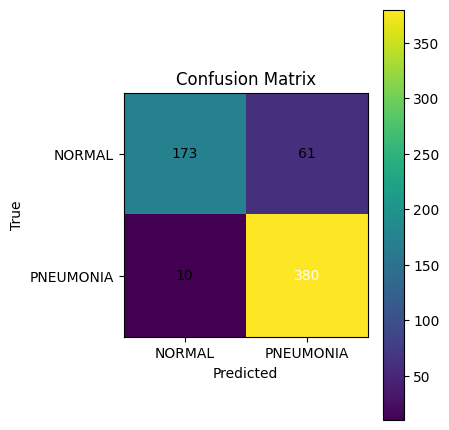

In [ ]:
# Collect predictions and true labels
y_true = np.concatenate([y.numpy().ravel() for _, y in test_ds.unbatch().batch(1024)])
y_prob = best.predict(test_ds, verbose=1).ravel()
y_pred = (y_prob >= 0.5).astype(int)

# Class names in order used by datasets: [CLASS_NAMES[0], CLASS_NAMES[1]]
print("Class order:", CLASS_NAMES)
print("\nClassification report:")
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
def plot_confusion_matrix(cm, class_names):
    fig, ax = plt.subplots(figsize=(4.5, 4.5))
    im = ax.imshow(cm, interpolation='nearest')
    ax.figure.colorbar(im, ax=ax)
    tick_marks = np.arange(len(class_names))
    ax.set_xticks(tick_marks); ax.set_yticks(tick_marks)
    ax.set_xticklabels(class_names); ax.set_yticklabels(class_names)
    ax.set_xlabel('Predicted'); ax.set_ylabel('True')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
    ax.set_title("Confusion Matrix")
    plt.tight_layout()

plot_confusion_matrix(cm, CLASS_NAMES)
plt.show()

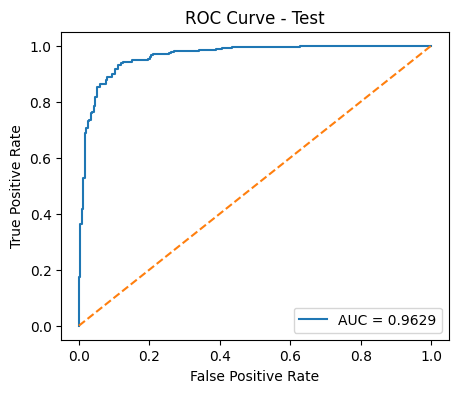

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

# CLASS_NAMES is now defined in an earlier cell

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    x = image.img_to_array(img)[np.newaxis, ...]
    x = tf.keras.applications.efficientnet.preprocess_input(x)
    prob = best.predict(x)[0,0]
    pred = int(prob >= 0.5)
    print(f"Predicted: {CLASS_NAMES[pred]}  |  Probability of PNEUMONIA: {prob:.4f}")

# Example:
# predict_image("/content/chest_xray/test/PNEUMONIA/person1_virus_1.jpeg")

In [ ]:
best.save("/content/chestxray_pneumonia_classifier.keras")
# Convert to TFLite (optional)
converter = tf.lite.TFLiteConverter.from_keras_model(best)
tflite_model = converter.convert()
with open("/content/chestxray_pneumonia_classifier.tflite", "wb") as f:
    f.write(tflite_model)
print("Saved: /content/chestxray_pneumonia_classifier.keras and .tflite")


Saved artifact at '/tmp/tmpwgaj2x5v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135330304557712: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  135330304562512: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  135331063421968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135331063422352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135331063421008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135331063423504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135331063424080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135331063422928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135331063421584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135331063423888: TensorSpec(shape=(), dtype=tf.resource, name=Non

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved Keras model
model = tf.keras.models.load_model("/content/chestxray_pneumonia_classifier.keras")

# Load a new image (e.g., your person3_virus_15.jpeg)
img_path = "/content/person3_virus_15.jpeg"
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

# Predict
prediction = model.predict(img_array)
probability = prediction[0][0]

# Show result
plt.imshow(img)
plt.axis('off')
plt.show()

if probability > 0.5:
    print(f"Pneumonia detected! Confidence: {probability:.2f}")
else:
    print(f"Normal lung. Confidence: {1-probability:.2f}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/person3_virus_15.jpeg'

Saving person1_virus_11.jpeg to person1_virus_11.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


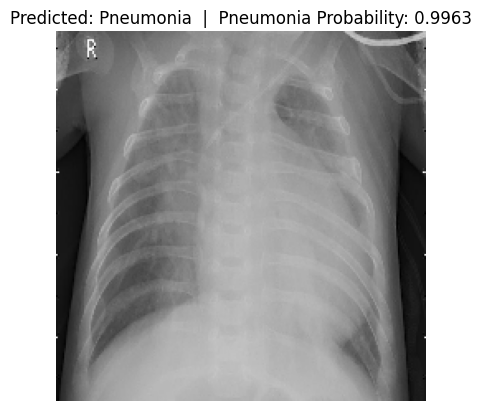

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Pick an image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Define image size
IMG_SIZE = (224, 224)

# Load and preprocess image
img = image.load_img(img_path, target_size=IMG_SIZE)
x = image.img_to_array(img)[np.newaxis, ...]
x = tf.keras.applications.efficientnet.preprocess_input(x)

# Load your trained model
best = tf.keras.models.load_model("best_model.keras")

# Predict
prob = best.predict(x)[0,0]
pred = int(prob >= 0.5)

# Define class names
CLASS_NAMES = ["Normal", "Pneumonia"]

# Show result
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {CLASS_NAMES[pred]}  |  Pneumonia Probability: {prob:.4f}")
plt.show()
